<a href="https://colab.research.google.com/github/WayneGretzky1/CSCI-4521-Applied-Machine-Learning/blob/main/1_2_NN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download & load seed dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
df = pd.read_csv("https://raw.githubusercontent.com/be-prado/csci4521/refs/heads/main/Seeds.csv")

In [ ]:
df.head()

### Create features and label matricies

In [ ]:
# TODO: make a dataframe with only the selected features 'area' and 'compactness'


In [ ]:
# TODO: make a dataframe with only the labels


In [ ]:
# TODO: move data from dataframes to numpy arrays


### Classifying new seeds

What type would we expect a seed with an area of 12 cm^2 and a compactness/roundness of 0.9? Guesses?

In [ ]:
np.set_printoptions(suppress=True) #Set numpy to print not in scientific notation

In [ ]:
# functions from last time

def distance_sq(p0, p1):
  '''Computes squared Euclidean distance'''
  return np.sum( (p0-p1)**2 )


# nearest neighbor classifier for single sample
def nn_classify_sample(training_set, training_labels, new_example):
  dists = np.array([distance_sq(t,new_example) for t in training_set])
  nearest_idx = dists.argmin()
  return training_labels[nearest_idx]

### Automating nearest neighbors classification:

In [ ]:
# TODO: practice using classification function


In [ ]:
# TODO: create helper function called nn_classify for classifying a set of example features (stored in numpy arrays!)


### Drawing neighbor maps:

In [ ]:
#Test every possible feature pair between min and max feature values
n = 100  # step size in the mesh
x_min, x_max = features[:, 0].min() - 0.2, features[:, 0].max() + 0.2
y_min, y_max = features[:, 1].min() - 0.2, features[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, n), np.linspace(y_min, y_max, n))
test_features = np.array([xx.ravel(), yy.ravel()]).transpose()
print("Array of grid data points that will be tested in our classification:")
print(test_features)

Array of grid data points that will be tested in our classification:
[[10.39       0.6081   ]
 [10.5010101  0.6081   ]
 [10.6120202  0.6081   ]
 ...
 [21.1579798  1.1183   ]
 [21.2689899  1.1183   ]
 [21.38       1.1183   ]]


In [ ]:
# classify all the grid data points
z = nn_classify(features, labels, test_features)
print("Classification of the artificial data points:")
print(z)

(10000, 2)
Classification of the artificial data points:
[3. 3. 3. ... 2. 2. 2.]


In [ ]:
z = z.reshape(xx.shape) # make classification array into a 2D array for plot
fig = plt.figure()
plt.pcolormesh(xx, yy, z)

In [ ]:
plt.scatter(features[:, 0], features[:, 1], c=labels, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Outcome classification")
plt.xlabel("Area")
plt.ylabel("Compactness")
plt.show()

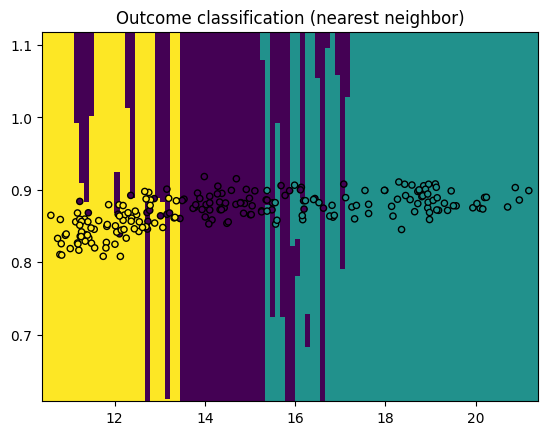

In [ ]:
#Color mesh of predictions
z = z.reshape(xx.shape)
fig = plt.figure()
plt.pcolormesh(xx, yy, z)

#Scatter Plot of actual samples:
plt.scatter(features[:, 0], features[:, 1], c=labels, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Outcome classification (nearest neighbor)")
plt.show()

In [ ]:
# Function that wraps up the classification and graphing with nicer colors

def graphClassifier2D(X,Y, classifier):
  # Create color maps
  cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFFF'])
  cmap_bold  = ListedColormap(['#FF0000', '#0000FF', '#00FFFF'])

  h = 0.1  # step size in the mesh
  x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
  y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  test_features = np.array([xx.ravel(), yy.ravel()]).transpose()
  z = classifier(X, Y, test_features)

  z = z.reshape(xx.shape)
  fig = plt.figure()
  plt.pcolormesh(xx, yy, z, cmap=cmap_light)

  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor='k', s=20)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("Outcome classification (nearest neighbor)")
  plt.xlabel("Area")
  plt.ylabel("Compactness")
  plt.show()

In [ ]:
graphClassifier2D(features, labels, nn_classify)

Units don't match (cm vs cm^2), and ranges are vastly different (12-20 vs 0.8-0.95).

How can we fix this?

In [ ]:
def graphClassifier2D(X,Y, classifier, normalize=False):
  # Create color maps
  cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFFF'])
  cmap_bold  = ListedColormap(['#FF0000', '#0000FF', '#00FFFF'])

  # z-score normalization!
  if normalize:
    ## TODO: add z-score normalization


  h = 0.1  # step size in the mesh
  x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
  y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  test_features = np.array([xx.ravel(), yy.ravel()]).transpose()
  z = classifier(X, Y, test_features)

  z = z.reshape(xx.shape)
  fig = plt.figure()
  plt.pcolormesh(xx, yy, z, cmap=cmap_light)

  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor='k', s=20)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("Outcome classification (nearest neighbor)")
  plt.xlabel("Area")
  plt.ylabel("Compactness")
  plt.show()

In [ ]:
graphClassifier2D(features, labels, nn_classify, True)

## Avoiding overfitting

### Leave one out accuracy

In [ ]:
# TODO: create helper function called nn_one_out_classify for classifying a set of example features (stored in numpy arrays!)
def nn_one_out_classify(training_set, training_labels):

  return result

In [ ]:
# Function that wraps up the classification and graphing with nicer colors
# note the data set was implicitly normalized in the graphClassifier2D function
# this implicitly changes should often be avoided or at least be be noted
one_out_labels = nn_one_out_classify(features, labels)

one_out_accuracy = 100 * np.sum(one_out_labels == labels) / labels.shape[0]
print(f"Leave one out accuracy: {one_out_accuracy}")

plt.scatter(features[:,0], features[:,1], c=one_out_labels, cmap=ListedColormap(['#FF0000', '#0000FF', '#00FFFF']), edgecolor='k', s=20)
plt.xlim(features[:,0].min()-0.1, features[:,0].max()+0.1)
plt.ylim(features[:,1].min()-0.1, features[:,1].max()+0.1)
plt.title("Outcome classification (nearest neighbor with leave one out method)")
plt.xlabel("Area")
plt.ylabel("Compactness")
plt.show()

### Train-test split

In [ ]:
# shuffle the data so the training, test split is not biased
def shuffle_data(X, Y):
  n = Y.shape[0]
  shuffled_idx = np.arange(n)
  np.random.shuffle(shuffled_idx)

  shuffled_X = X[shuffled_idx]
  shuffled_Y = Y[shuffled_idx]

  return shuffled_X, shuffled_Y

# split data
def train_test_split(X, Y, ratio = 0.9):
  n = Y.shape[0]

  X_train = X[:int(n*ratio)]
  y_train = Y[:int(n*ratio)]

  X_test = X[int(n*ratio):]
  y_test = Y[int(n*ratio):]

  return X_train, y_train, X_test, y_test

# classify test data based on training data
def train_test_classifier(X, Y):
  shuffled_X, shuffled_Y = shuffle_data(X, Y)
  X_train, y_train, X_test, y_test = train_test_split(shuffled_X, shuffled_Y)
  return nn_classify(X_train, y_train, X_test), y_test

In [ ]:
train_test_predictions, y_test = train_test_classifier(features, labels)
train_test_accuracy = 100 * np.sum(train_test_predictions == y_test) / y_test.shape[0]
print(f"Accuracy for train-test split: {train_test_accuracy}")